In [1]:
import numpy as np
import pandas as pd

In [3]:
full_data = pd.read_csv('/Users/xiaoy/Desktop/DS_1007/Project/Most-Recent-Cohorts-All-Data-Elements.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6,9,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1008,1009,1010,1011,1014,1015,1016,1017,1018,1019,1021,1022,1023,1027,1028,1029,1030,1031,1032,1034,1035,1036,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1065,1066,1067,1068,1069,1070,1071,1073,1074,1075,1076,1078,1079,1080,1081,1082,1083,1084,1086,1087,1088,1089,1091,1092,1093,1094,1095,1096,1097,1099,1100,1101,1102,1104,1105,1106,1107,1108,1109,1110,1112,1113,1114,1115,1118,1119,1121,1122,1123,1125,1127,1128,1131,1132,1134,1135,1136,1138,1140,1141,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1170,1171,1172,1173,1174,1175,1177,1178,1179,1180,1183,1184,1185,1186,1187,1188,1190,1192,1196,1199,1200,1201,1209,1212,1213,1214,1222,1223,1224,1225,1226,1227,1235,1236,1237,123

In [35]:
full_data.columns

Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'ACCREDAGENCY', 'INSTURL', 'NPCURL',
       ...
       'OMAWDP6_FTNFT_POOLED_SUPP', 'OMAWDP8_FTNFT_POOLED_SUPP',
       'OMENRYP8_FTNFT_POOLED_SUPP', 'OMENRAP8_FTNFT_POOLED_SUPP',
       'OMENRUP8_FTNFT_POOLED_SUPP', 'OMAWDP6_PTNFT_POOLED_SUPP',
       'OMAWDP8_PTNFT_POOLED_SUPP', 'OMENRYP8_PTNFT_POOLED_SUPP',
       'OMENRAP8_PTNFT_POOLED_SUPP', 'OMENRUP8_PTNFT_POOLED_SUPP'],
      dtype='object', length=1899)

In [4]:
def cleanColumn(column, data):
    if type(data[column][0]) == str:
        data[column][data[column] == 'PrivacySuppressed'] = np.nan
    return data[column]

def cleanData(data):
    for column in data.columns:
        data[column] = cleanColumn(column, data)
    return data

def imputeValue(column, data):
    column_data = pd.to_numeric(data[column])
    column_mean = column_data.mean()
    for i, row in enumerate(column_data):
        if np.isnan(row):
            column_data.iloc[i] = column_mean
    return column_data

def imputeNumeric(columns, data):
    for column in columns:
        data[column] = imputeValue(column, data)
    return data

# def processCategorical(columns, data):
#     for column in columns:
#         data[column] = data[column].astype('category')
#     return data

In [5]:
def calculateCostEarning(data):
    cost_a = list(data['COSTT4_A'])
    cost_p = list(data['COSTT4_P'])
    cost = []
    for i in range(len(cost_a)):
        if not np.isnan(cost_a[i]):
            if not np.isnan(cost_p[i]):
                raise Exception('No school is like this')
            cost.append(cost_a[i])
        else:
            cost.append(cost_p[i])
    earning = data['MD_EARN_WNE_P6'] 
    return pd.DataFrame({'cost':cost, 'earning':earning})

def calculateC100(data):
    target_C100 = []
    C100_4 = data['C100_4']
    C100_L4 = data['C100_L4']
    data = data.drop(['C100_4', 'C100_L4'], 1)
    for i in range(len(C100_4)):
        if not np.isnan(C100_4[i]):
            if not np.isnan(C100_L4[i]):
                raise Exception('No school is like this')
            target_C100.append(C100_4[i])
        else:
            target_C100.append(C100_L4[i])
    data['C100_4'] = target_C100
    return data

def fillMean(data):
    data['AVGFACSAL'].fillna((data['AVGFACSAL'].mean()), inplace=True)
    data['UG'].fillna((data['UG'].mean()), inplace=True)
    data['PFTFAC'].fillna((data['PFTFAC'].mean()), inplace=True)
    data['UGDS_MEN'].fillna((data['UGDS_MEN'].mean()), inplace=True)
    data['UGDS_WOMEN'].fillna((data['UGDS_WOMEN'].mean()), inplace=True)
    return data

def fillIncome(data):
    income = {1: 44765, 2:73355, 4: 51492, 5: 41995, 6:64500, 8:63909, 9:71346,
              10:61255, 11:75628,12: 49426, 13: 51244, 15: 73486, 16: 48275, 
              17:59588, 18: 50532, 19:54736, 20: 53906, 21: 45215, 22:45727,
             23:51494, 24:75847, 25:70628 , 26:51084, 27:63488,
             28: 40593, 29:50238, 30:49509, 31:54996, 32:52431,
             33: 70303, 34:72222, 35: 45382, 36:60850, 37:47830,
             38: 60577, 39:51075, 40:48568, 41:54148, 42:55702,
             44: 58073, 45:47238, 46: 53017, 47: 47275, 48:55653,
             49: 62912, 50: 56990, 51: 66262, 53:64129, 54:42019,
             55: 55638, 56: 60214}
    data['ST_FIPS'] = data['ST_FIPS'].astype(float)
    data['MEDIAN_HH_INC'] = cleanColumn('MEDIAN_HH_INC', data)
    data['MEDIAN_HH_INC'].fillna(data.ST_FIPS.map(income), inplace=True)
    data['MEDIAN_HH_INC'] = data['MEDIAN_HH_INC'].astype(float)
    data['MEDIAN_HH_INC'].fillna(data['MEDIAN_HH_INC'].mean(), inplace=True)
    return data

##HISP: Hispanic students rose from 4 percent to 17 percent 
# API: Asian/Pacific Islander students rose from 2 percent to 7 percent
# Black: The percentage of Black students increased from 10 percent in 1976 to 14 percent in 2015
# White: 58%
def fillRace(data):
    data['UG_NRA'].fillna(0.01, inplace=True)
    data['UG_WHITENH'].fillna(0.58, inplace=True)
    data['UG_BLACKNH'].fillna(0.14, inplace=True)
    data['UG_API'].fillna(0.035, inplace=True)
    data['UG_AIANOLD'].fillna(0.035, inplace=True)
    data['UG_HISPOLD'].fillna(0.17, inplace=True)
    data['UG_UNKN'].fillna((1 - data['UG_NRA'] - 
                                data['UG_WHITENH'] - 
                                data['UG_BLACKNH'] - 
                                data['UG_API'] - 
                                data['UG_AIANOLD'] - 
                                data['UG_HISPOLD']),inplace=True)
    return data

def fillUnemp(data):
    unemp = {1: 3.8, 2:7.3, 4: 4.9, 5: 3.8, 6:4.3, 8:3.0, 9:4.5, 
             10:4.3, 11:5.6,12: 3.9, 13: 4.4, 15: 2.1, 16: 2.9, 17:4.6, 
             18: 3.2, 19:2.8, 20: 3.4, 21: 4.0, 22:4.4,
             23:2.7, 24:4.3, 25:3.5 , 26:4.7, 27:3.2,
             28: 4.5, 29:3.6, 30:4.1, 31:2.8, 32:4.9,
             33: 2.6, 34:4.6, 35: 5.6, 36:4.6, 37:4.5,
             38: 2.6, 39:4.4, 40:4.0, 41:4.1, 42:4.8,
             44: 4.5, 45:4.4, 46: 3.4, 47: 3.4, 48:4.0,
             49: 3.1, 50: 2.8, 51: 3.4, 53:4.8, 54:5.4,
             55: 2.9, 56: 3.9, 60:18, 66:4.4, 69:11.2, 72:8.8, 78:9.2}
    data['ST_FIPS'] = data['ST_FIPS'].astype(float)
    data['UNEMP_RATE'].fillna(data.ST_FIPS.map(unemp), inplace=True)
    data['UNEMP_RATE'] = data['UNEMP_RATE'].astype(float)
    data['UNEMP_RATE'].fillna(data['UNEMP_RATE'].mean(), inplace=True)
    return data

def calculateROI(data):
    data['cost'] = data['cost'].astype('int64')
    data['earning'] = data['earning'].astype('int64')
    data['ROI'] = (data['earning'])/data['cost']
    data.drop(['cost', 'earning'], 1, inplace=True)
    return data

In [8]:
features = []

admin_features = ['ADM_RATE', 'SAT_AVG']
# repay_features = ['RPY_1YR_N', 'RPY_3YR_N', 'RPY_5YR_N', 'RPY_7YR_N']
complete_features = ['C100_4', 'C100_L4']
# aid_features = ['GRAD_DEBT_MDN_SUPP', 'CUML_DEBT_N', 'GRAD_DEBT_MDN', 'DEBT_N', 'GRAD_DEBT_N']
root_features = ['LATITUDE', 'LONGITUDE']
school_features = ['REGION', 'LOCALE', 'ACCREDAGENCY', 'SCH_DEG', 'MAIN', 'NUMBRANCH', 
                   'HIGHDEG', 'CONTROL', 'ST_FIPS', 'AVGFACSAL', 'PFTFAC','ICLEVEL']
student_features = ['UG', 'UG_NRA', 'UG_UNKN', 'UG_WHITENH', 'UG_BLACKNH', 'UG_API', 'UG_AIANOLD', 
                    'UG_HISPOLD', 'APPL_SCH_PCT_GE2', 'APPL_SCH_PCT_GE3', 'APPL_SCH_PCT_GE4', 'APPL_SCH_PCT_GE5', 
                    'MEDIAN_HH_INC', 'UNEMP_RATE', 'UGDS_MEN', 'UGDS_WOMEN','UGNONDS','GRADS']

features.extend(admin_features)
#features.extend(repay_features)
features.extend(complete_features)
#features.extend(aid_features)
features.extend(root_features)
features.extend(school_features)
features.extend(student_features)

# We drop these variables because over 50% data in those variables are missing.
features_drop = ['APPL_SCH_PCT_GE2', 'APPL_SCH_PCT_GE3', 'APPL_SCH_PCT_GE4', 
                 'APPL_SCH_PCT_GE5', 'UGNONDS','GRADS', 'ACCREDAGENCY', 'CONTROL'
                ]

data = full_data[features]
data = data.drop(features_drop, 1)
cost_earning_df = calculateCostEarning(full_data)
data['cost'] = cost_earning_df['cost']
data['earning'] = cost_earning_df['earning']
data = cleanData(data)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
data.columns

Index(['ADM_RATE', 'SAT_AVG', 'C100_4', 'C100_L4', 'LATITUDE', 'LONGITUDE',
       'REGION', 'LOCALE', 'SCH_DEG', 'MAIN', 'NUMBRANCH', 'HIGHDEG',
       'ST_FIPS', 'AVGFACSAL', 'PFTFAC', 'ICLEVEL', 'UG', 'UG_NRA', 'UG_UNKN',
       'UG_WHITENH', 'UG_BLACKNH', 'UG_API', 'UG_AIANOLD', 'UG_HISPOLD',
       'MEDIAN_HH_INC', 'UNEMP_RATE', 'UGDS_MEN', 'UGDS_WOMEN', 'cost',
       'earning'],
      dtype='object')

## Fill NA values

In [10]:
numeric_columns = ['LATITUDE', 'LONGITUDE', 'NUMBRANCH', 'C100_4']

categorical_column = ['REGION', 'LOCALE', 'SCH_DEG', 'MAIN', 'HIGHDEG', 'ST_FIPS', 'ICLEVEL']


data = calculateC100(data)
data = imputeNumeric(numeric_columns, data)
data = fillMean(data)
data = fillRace(data)
data = fillIncome(data)
data = fillUnemp(data)
# data = processCategorical(categorical_column, data)
data.dropna(inplace=True)
data = calculateROI(data)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
data = data.rename(index=str, columns={"C100_4": "COMPL_RATE"})
data.columns

Index(['ADM_RATE', 'SAT_AVG', 'LATITUDE', 'LONGITUDE', 'REGION', 'LOCALE',
       'SCH_DEG', 'MAIN', 'NUMBRANCH', 'HIGHDEG', 'ST_FIPS', 'AVGFACSAL',
       'PFTFAC', 'ICLEVEL', 'UG', 'UG_NRA', 'UG_UNKN', 'UG_WHITENH',
       'UG_BLACKNH', 'UG_API', 'UG_AIANOLD', 'UG_HISPOLD', 'MEDIAN_HH_INC',
       'UNEMP_RATE', 'UGDS_MEN', 'UGDS_WOMEN', 'COMPL_RATE', 'ROI'],
      dtype='object')

In [3]:
# data.to_csv('ROI_processed.csv')
data = pd.read_csv('/Users/xiaoy/Desktop/DS_1007/Project/ROI_processed.csv')

data = data.drop(columns=['Unnamed: 0'])
data.describe()

,ADM_RATE,SAT_AVG,LATITUDE,LONGITUDE,REGION,LOCALE,SCH_DEG,MAIN,NUMBRANCH,HIGHDEG,...,UG_BLACKNH,UG_API,UG_AIANOLD,UG_HISPOLD,MEDIAN_HH_INC,UNEMP_RATE,UGDS_MEN,UGDS_WOMEN,COMPL_RATE,ROI
count,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,...,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000
mean,0.652137,1060.199213,38.557691,-88.286036,4.114173,20.583465,2.965354,0.965354,1.519685,3.808661,...,0.115605,0.036653,0.008784,0.048974,63587.498961,3.411079,0.433302,0.566698,0.393478,1.221019
std,0.195154,136.180247,4.688927,13.864629,1.938463,9.581826,0.203352,0.182953,2.869503,0.444301,...,0.189629,0.059953,0.035267,0.082917,10767.168701,0.706810,0.124877,0.124877,0.206939,0.534795
min,0.048100,712.000000,18.344193,-157.926586,0.000000,11.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,31403.340000,2.120000,0.000000,0.000000,0.000000,0.409750
25%,0.539050,970.250000,35.144908,-94.095774,2.000000,12.000000,3.000000,1.000000,1.000000,4.000000,...,0.028325,0.007600,0.002000,0.010600,56319.700000,2.950000,0.385725,0.507800,0.230600,0.821142
50%,0.669300,1040.000000,39.729618,-84.970306,4.000000,21.000000,3.000000,1.000000,1.000000,4.000000,...,0.055300,0.015900,0.003700,0.021150,63344.330000,3.260000,0.437250,0.562750,0.367100,1.042484
75%,0.786300,1120.750000,41.740329,-78.638033,5.000000,32.000000,3.000000,1.000000,1.000000,4.000000,...,0.119200,0.036900,0.007000,0.050075,71568.645000,3.680000,0.492200,0.614275,0.533675,1.580413
max,1.000000,1555.000000,64.857560,-64.972866,9.000000,43.000000,3.000000,1.000000,23.000000,4.000000,...,1.000000,0.726600,1.000000,0.929700,95275.150000,7.550000,1.000000,1.000000,1.000000,7.639133


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a274080f0>,
      dtype=object)

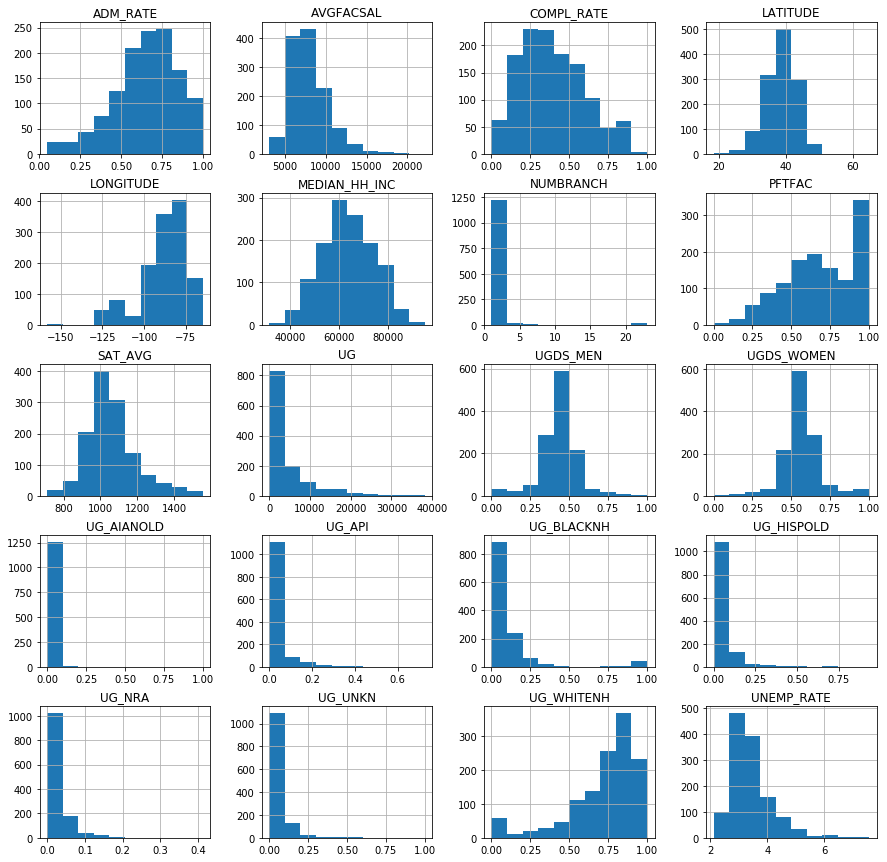

In [21]:
num_data.hist(figsize=(15,15))

In [19]:
categorical_column = ['REGION', 'LOCALE', 'SCH_DEG', 'MAIN', 'HIGHDEG', 'ST_FIPS', 'ICLEVEL', 'ROI']
num_data = data.drop(categorical_column, axis=1)
cat_data = data[categorical_column]

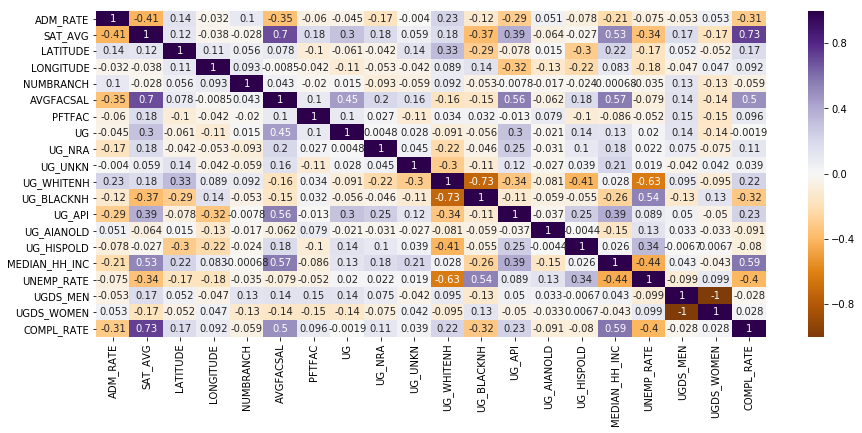

In [18]:
fig, ax = plt.subplots(figsize=(15,6))
sns.heatmap(num_data.corr(), ax=ax, annot=True, cmap="PuOr")

In [5]:
data.shape

(1270, 28)

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# data.to_csv('ROI_processed.csv')
data = pd.read_csv('/Users/xiaoy/Desktop/DS_1007/Project/ROI_processed.csv')

data = data.drop(columns=['Unnamed: 0'])
data.describe()

,ADM_RATE,SAT_AVG,LATITUDE,LONGITUDE,REGION,LOCALE,SCH_DEG,MAIN,NUMBRANCH,HIGHDEG,...,UG_BLACKNH,UG_API,UG_AIANOLD,UG_HISPOLD,MEDIAN_HH_INC,UNEMP_RATE,UGDS_MEN,UGDS_WOMEN,COMPL_RATE,ROI
count,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,...,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000
mean,0.652137,1060.199213,38.557691,-88.286036,4.114173,20.583465,2.965354,0.965354,1.519685,3.808661,...,0.115605,0.036653,0.008784,0.048974,63587.498961,3.411079,0.433302,0.566698,0.393478,1.221019
std,0.195154,136.180247,4.688927,13.864629,1.938463,9.581826,0.203352,0.182953,2.869503,0.444301,...,0.189629,0.059953,0.035267,0.082917,10767.168701,0.706810,0.124877,0.124877,0.206939,0.534795
min,0.048100,712.000000,18.344193,-157.926586,0.000000,11.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,31403.340000,2.120000,0.000000,0.000000,0.000000,0.409750
25%,0.539050,970.250000,35.144908,-94.095774,2.000000,12.000000,3.000000,1.000000,1.000000,4.000000,...,0.028325,0.007600,0.002000,0.010600,56319.700000,2.950000,0.385725,0.507800,0.230600,0.821142
50%,0.669300,1040.000000,39.729618,-84.970306,4.000000,21.000000,3.000000,1.000000,1.000000,4.000000,...,0.055300,0.015900,0.003700,0.021150,63344.330000,3.260000,0.437250,0.562750,0.367100,1.042484
75%,0.786300,1120.750000,41.740329,-78.638033,5.000000,32.000000,3.000000,1.000000,1.000000,4.000000,...,0.119200,0.036900,0.007000,0.050075,71568.645000,3.680000,0.492200,0.614275,0.533675,1.580413
max,1.000000,1555.000000,64.857560,-64.972866,9.000000,43.000000,3.000000,1.000000,23.000000,4.000000,...,1.000000,0.726600,1.000000,0.929700,95275.150000,7.550000,1.000000,1.000000,1.000000,7.639133


In [34]:
pair_data = data[['REGION', 'MAIN', 'SCH_DEG', 'ICLEVEL', 'LOCALE', 'ROI']]

In [35]:
bins = [0, 0.821142, 1.042484, 1.580413, 8]
labels = ["25%", "50%", "75%", "100%"]
pair_data['ROI_LEVEL'] = pd.cut(pair_data['ROI'], bins=bins, labels=labels)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
# pairplt.savefig("pairs_ori.png")

In [36]:
pair_data.describe()

,REGION,MAIN,SCH_DEG,ICLEVEL,LOCALE,ROI
count,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000
mean,4.114173,0.965354,2.965354,1.014961,20.583465,1.221019
std,1.938463,0.182953,0.203352,0.121443,9.581826,0.534795
min,0.000000,0.000000,1.000000,1.000000,11.000000,0.409750
25%,2.000000,1.000000,3.000000,1.000000,12.000000,0.821142
50%,4.000000,1.000000,3.000000,1.000000,21.000000,1.042484
75%,5.000000,1.000000,3.000000,1.000000,32.000000,1.580413
max,9.000000,1.000000,3.000000,2.000000,43.000000,7.639133


In [173]:
region_title = ("New England", "Mid East", "Great Lakes", "Plains", "Southeast", "Southwest", "Rocky Moutains", "Far West", "Outlying Areas")
main_title = ("Not Main", "Main")
sch_deg_title = (0, 1, 2)
iclevel_title = ("< 4 Year", "4 Year")
locale_title = ("City:Large", "City:Midsize", "City:Small", "Subsurb:Large", "Subsurb:Midsize", "Subsurb:Small", "Town:Fringe", "Town:Distant", "Town:Remote", "Rural:Fringe", "Rural:Distant", "Rural:Remote")

## REGION

In [129]:
binned = pair_data.groupby(['ROI_LEVEL', 'REGION']).count()['ROI']

In [130]:
binned = binned.fillna(0)

In [133]:
roi_bin_list = ["25%", "50%", "75%", "100%"]
cul_list = []
for i in range(4):
    row = list(binned[roi_bin_list[i]])
    if cul_list != []:
        for j in range(10):
            row[j] += cul_list[i-1][j]
    cul_list.append(row)

In [93]:
# bin_list = []
# cul_list = []
# for i in range(10):
#     row = list(binned[i])
#     bin_list.append(row)
#     if cul_list == []:
#         cul_list.append(row)
#     else:
#         row_copy = row.copy()
#         for j in range(4):
#             row_copy[j] += cul_list[i-1][j]
#         cul_list.append(row_copy)

In [134]:
cul_list

[[0.0, 27.0, 72.0, 52.0, 20.0, 93.0, 12.0, 3.0, 39.0, 0.0],
 [0.0, 43.0, 129.0, 115.0, 80.0, 166.0, 34.0, 6.0, 62.0, 0.0],
 [0.0, 63.0, 196.0, 164.0, 103.0, 278.0, 50.0, 13.0, 84.0, 1.0],
 [1.0, 83.0, 242.0, 208.0, 147.0, 349.0, 94.0, 32.0, 113.0, 1.0]]

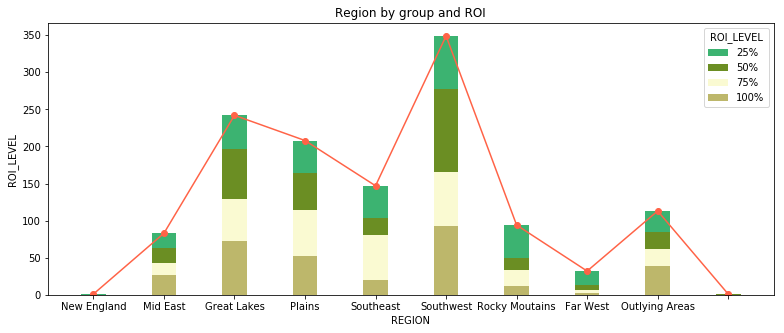

In [168]:
fig, ax = plt.subplots(figsize=(13,5))
N = 10
ind = np.arange(N)
width = 0.35
colors = ['darkkhaki', 'lightgoldenrodyellow', 'olivedrab', 'mediumseagreen']
p1 = plt.bar(ind, cul_list[3], width, color=colors[3])
p2 = plt.bar(ind, cul_list[2], width, color=colors[2])
p3 = plt.bar(ind, cul_list[1], width, color=colors[1])
p4 = plt.bar(ind, cul_list[0], width, color=colors[0])
p5 = plt.plot(cul_list[3], 'o-', color="tomato")

plt.xlabel('REGION')
plt.ylabel('ROI_LEVEL')

plt.title('Region by group and ROI')
plt.xticks(ind, region_title)
plt.legend((p1[0], p2[0], p3[0], p4[0]), ("25%", "50%", "75%", "100%"), title="ROI_LEVEL")


plt.show()

## Other

In [ ]:
binned = pair_data.groupby(['ROI_LEVEL', 'SCH_DEG']).count()['ROI']
binned = binned.fillna(0)

roi_bin_list = ["25%", "50%", "75%", "100%"]
cul_list = []
for i in range(4):
    row = list(binned[roi_bin_list[i]])
    if cul_list != []:
        for j in range(2):
            row[j] += cul_list[i-1][j]
    cul_list.append(row)

fig, ax = plt.subplots(figsize=(8,5))

N = 3
ind = np.arange(N)
width = 0.35
colors = ['darkkhaki', 'lightgoldenrodyellow', 'olivedrab', 'mediumseagreen']
p1 = plt.bar(ind, cul_list[3], width, color=colors[3])
p2 = plt.bar(ind, cul_list[2], width, color=colors[2])
p3 = plt.bar(ind, cul_list[1], width, color=colors[1])
p4 = plt.bar(ind, cul_list[0], width, color=colors[0])
p5 = plt.plot(cul_list[3], 'o-', color="tomato")

plt.xlabel('SCH_DEG')
plt.ylabel('ROI_LEVEL')

plt.title('Sch_Deg by group and ROI')
plt.xticks(ind, sch_deg_title)
plt.legend((p1[0], p2[0], p3[0], p4[0]), ("25%", "50%", "75%", "100%"), title="ROI_LEVEL")


plt.show()